# Agglomerative Hierarchical Clustering  
Scenario:  
You’re grouping products based on their dimensions (length, width). You want to use Agglomerative Hierarchical Clustering to visualize the relationships between products and identify natural clusters.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the data
products = pd.DataFrame({
    "Length": [10, 12, 25, 30, 35, 55, 60],
    "Width": [5, 6, 14, 18, 20, 40, 45]
})

products

,Length,Width
0,10,5
1,12,6
2,25,14
3,30,18
4,35,20
5,55,40
6,60,45


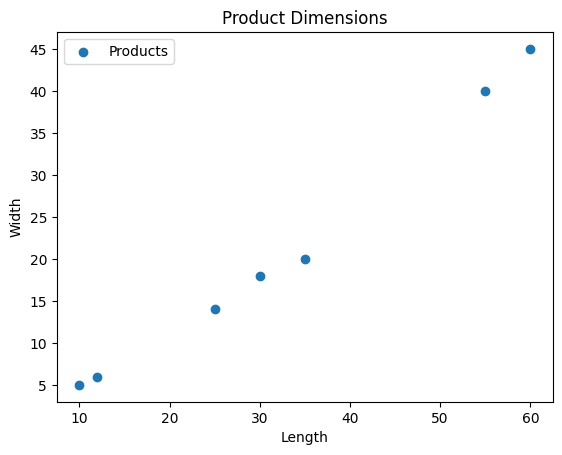

In [2]:
# Visualize the data
plt.scatter(products["Length"], products["Width"], label = 'Products')

plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Product Dimensions")
plt.legend()
plt.show()

In [4]:
# Hierarchical clustering
linked = linkage(products, method = 'ward')
linked

array([[ 0.        ,  1.        ,  2.23606798,  2.        ],
       [ 3.        ,  4.        ,  5.38516481,  2.        ],
       [ 5.        ,  6.        ,  7.07106781,  2.        ],
       [ 2.        ,  8.        , 10.40833   ,  3.        ],
       [ 7.        , 10.        , 34.67660114,  5.        ],
       [ 9.        , 11.        , 77.93807065,  7.        ]])

In [9]:
# You can mix and choose when calling linkage to use different methods and metrics
linked_manhattan = linkage(products, method='average', metric='cityblock')  # Manhattan Distance
linked_cosine = linkage(products, method='average', metric='cosine')  # Cosine Similarity

In this stage, the algorithm undertakes a procedure that is very similar to the k-means algorithm. Individuals are grouped in several intermediate small groups called “pre-clusters”. The goal of pre-clustering is to reduce substantially the size of initial elements/records and thus the dimension of the matrix that contains distances between all possible pairs of “N” cases. When pre-clustering is complete, all cases in the same pre-cluster are treated as a single entity. The size of the distance matrix is no longer dependent on the number of cases but on the number of pre-clusters.  
  
The pre-cluster step uses a sequential clustering approach. It scans the data records one by one and decides if the current record should be merged with the previously formed clusters or starts a new cluster based upon its similarity to existing nodes and using the distance measure as the similarity criterion (either Log- Likelihood Distance or Euclidean Distance).  
  
In Two-Step Cluster, outliers are automatically detected and registered as records that do not fit well into any pre-cluster. Before rebuilding the tree in the second step, this procedure checks for potential outliers and sets them aside. After rebuilding the tree, the procedure checks to see if these outliers can fit in without increasing the tree size.  

---

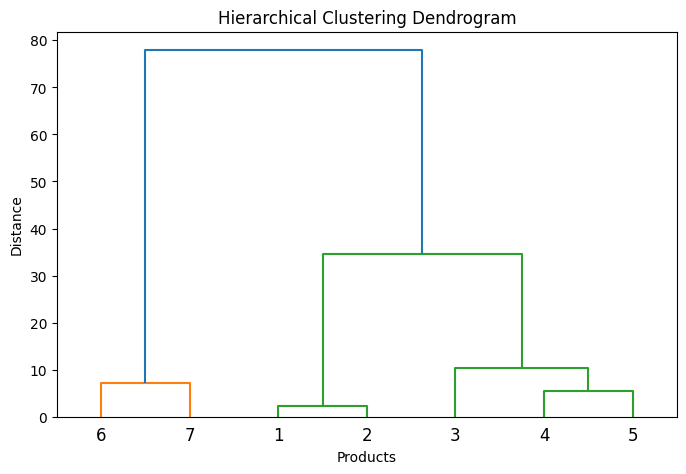

In [5]:
# Dendrogram
plt.figure(figsize = (8, 5))
dendrogram(linked, labels = range(1, len(products) + 1))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Products')
plt.ylabel('Distance')
plt.show()

The cluster step takes sub-clusters resulting from the pre-cluster step as input and then groups them into the desired or “optimal” number of clusters. Since the number of sub-clusters is much lower than the number of original records, a traditional clustering method can be used effectively (an agglomerative hierarchical clustering method). The agglomerative clustering can be used to produce a range of solutions, but Two Step also works well with the auto-cluster method.

---

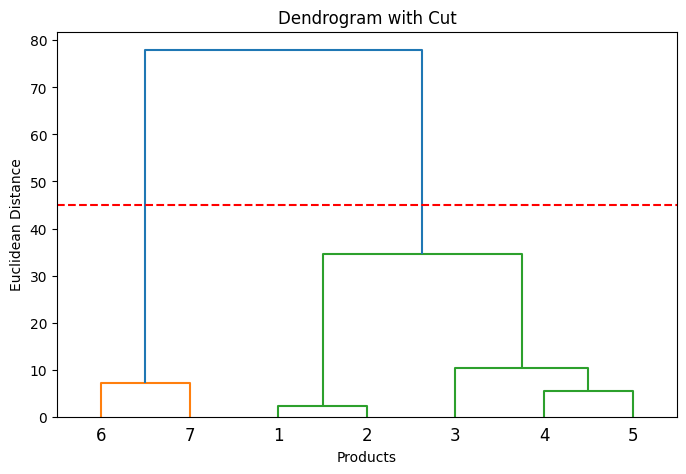

In [7]:
plt.figure(figsize=(8, 5))
dendrogram(linked, labels=range(1, len(products) + 1))
plt.axhline(y=45, color='red', linestyle='--')  # Add a horizontal line
plt.title('Dendrogram with Cut')
plt.xlabel('Products')
plt.ylabel('Euclidean Distance')
plt.show()

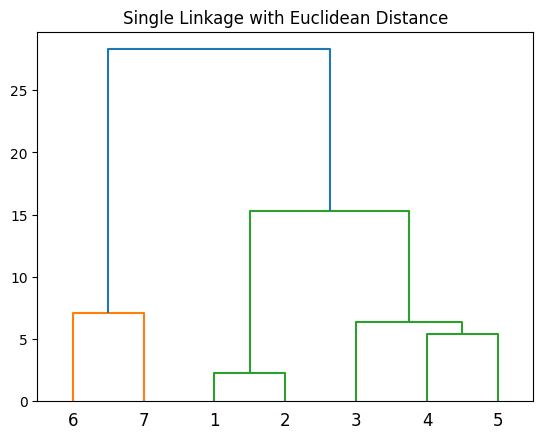

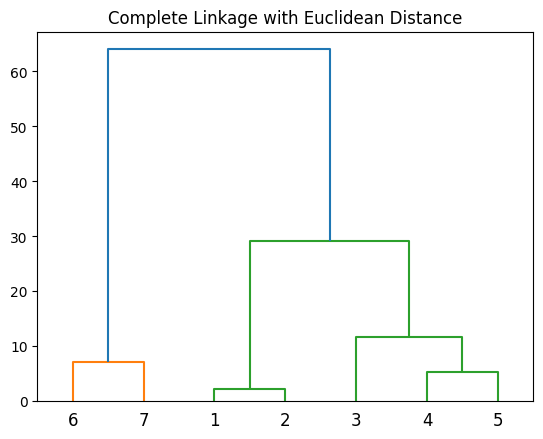

   Length  Width  Cluster
0      10      5        1
1      12      6        1
2      25     14        1
3      30     18        1
4      35     20        1
5      55     40        1
6      60     45        1


In [10]:
from scipy.cluster.hierarchy import fcluster

# Single Linkage with Euclidean Distance
linked_single = linkage(products, method='single')
plt.figure()
dendrogram(linked_single, labels=range(1, len(products) + 1))
plt.title('Single Linkage with Euclidean Distance')
plt.show()

# Complete Linkage with Euclidean Distance
linked_complete = linkage(products, method='complete')
plt.figure()
dendrogram(linked_complete, labels=range(1, len(products) + 1))
plt.title('Complete Linkage with Euclidean Distance')
plt.show()

# Extracting clusters from Ward’s dendrogram (Cut at height 1500)
cluster_labels = fcluster(linked, t=1500, criterion='distance')
products["Cluster"] = cluster_labels
print(products)


# Metrics

In [12]:
# Silhouette Score
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Extract clusters from dendrogram (cut at height 45)
cluster_labels = fcluster(linked, t=45, criterion='distance')

# Compute Silhouette Score (for Hierarchical Clustering)
score = silhouette_score(products, cluster_labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.6929871672228377


In [13]:
# Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score

# Compute Calinski-Harabasz Index
ch_score = calinski_harabasz_score(products, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_score}")

Calinski-Harabasz Index: 21.774960055717155


In [14]:
# Davies-Bouldin Index
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin Index
db_score = davies_bouldin_score(products, cluster_labels)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 0.3098205371353919
